<a href="https://colab.research.google.com/github/Shashwat-143/Titanic-Classification/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Classication**

Machine learning algorithms must determine whether a Titanic passenger will live or die in order to solve the Titanic categorization problem. The data for this issue is openly accessible on Kaggle and include details on the age, gender, socioeconomic status, and whether or not each passenger was travelling with a family of each.






Although there are many various machine learning algorithms that may be used to address this issue, some of the more well-liked ones include random forests, decision trees, and logistic regression. Depending on the particular data set and the desired accuracy, many classifiers may be used to solve the Titanic problem, although logistic regression is typically a solid place to start.

A well-known machine learning issue, the Titanic classification problem has long been used to educate and learn about machine learning. It's a hard challenge, but it's also enjoyable, and you can use it to learn about a lot of different machine learning ideas.

The following are some of the most crucial elements for determining if a person would survive aboard the Titanic:

1) Social class: First-class travellers had a higher chance of surviving than third-class travellers.

2) Gender: Women had a higher chance of surviving than males did.

3) Age: Children have a higher chance of surviving than adults.

4) Travel: Passengers who were travelling with relatives had a higher chance of surviving.

Although not the only ones, these are some of the most significant elements that influence survival. We can more accurately forecast who survived the Titanic by utilising machine learning to find these parameters.

Depending on the particular data collection and the required level of accuracy, several classifiers will perform best for the Titanic problem. However, logistic regression is a solid place to start and may be used to this issue to attain high accuracy.

# **Import Libraries**

Data Analysis and Wrangling

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Machine Learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# **Acquire Data**

The Python Pandas packages make it easier to deal with our datasets. To begin, we load the training and testing datasets into Pandas DataFrames. We also combine these datasets in order to perform specific operations on both datasets at the same time.

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

# **Analyze by describing data**

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# **Preview the Data**

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

# **Distribution of Numerical Feature Values**

1. The total number of samples is 891, which is 40% of the total number of people on board the Titanic (2,224).
Survived is a category trait having a value of 0 or 1.
2. Around 38% of the samples survived, which is comparable to the real survival rate of 32%.
3. The majority of travellers (> 75%) did not travel with their parents or children.
4. Most passengers (> 75%) did not travel with parents or children.
5. Almost 30% of the travellers were accompanied by siblings and/or spouses.
6. With few people, fares ranged greatly.

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Distribution of Categorical Features**

1. The names in the dataset are all unique (count=unique=891).
2. The gender variable has two alternative values, with 65% being male (top=male, frequency=577/count=891).
3. There are multiple duplicate cabin values among samples. Alternatively, many guests might share a cabin.
4. Embarked can take one of three values. Most travellers utilise the S port (top=S).

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# **Assumtions Based on Data Analysis**

# Correlating

We want to see how strongly each characteristic correlates with Survival. We want to do this early in the project so that we can match these fast correlations with simulated correlations later on.

# Completing

1. We may wish to finish the Age feature because it is clearly connected to survival.
2. We may wish to finish the Embarked feature since it may be related to survival or another key feature.


# Correcting

1. The Ticket characteristic may be removed from our study due to a significant proportion of duplicates (22%), and there may be no association between Ticket and survival.
2. The cabin feature may be deleted because it is substantially incomplete or has a large number of null values in both the training and test datasets.
3. PassengerId may be removed from the training dataset because it has no bearing on survival.
4. Because the name characteristic is rather non-standard and may not directly help to survival, it may be eliminated.

# Creating

1. We might want to add a new feature called Family based on Parch and SibSp to keep track of how many family members are on board.
2. We may wish to modify the Name feature in order to extract Title as a new feature.
3. We might want to consider adding a new function for age bands. This converts an ordinal categorical feature from a continuous numerical characteristic.
4. If it assists our analysis, we may wish to include a Fare range option.


# Classifying

Based on the problem description, we may potentially add to our assumptions.

1. Women (Sex=female) had a higher chance of survival.
2. Children (Age?) had a higher chance of survival.
3. Upper-class passengers (Pclass=1) were more likely to be successful.


# **Analyze by pivoting features**

We can rapidly analyse our feature correlations by pivoting features against each other to check some of our findings and assumptions. At this time, we can only do so for features that do not have any empty values. It also makes sense to do so exclusively for categorical (Sex), ordinal (Pclass), or discrete (SibSp, Parch) characteristics.


1. Pclassification We find a strong (>0.5) connection between Pclass=1 and Survived (classifying #3). We make the decision to add this functionality in our model.
2. Sex We confirm that Sex=female has a very high survival rate of 74% (classifying #1) throughout issue description.
3. Parch and SibSp For some values, these characteristics have no connection. It could be advisable to create a feature or collection of features from these separate features (creation #1).

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# **Analyze by Visualizing Data**

# **Correlating numerical features**



Let us begin by comprehending the relationships between numerical characteristics and our solution aim (survival).

A histogram chart is excellent for analysing continuous numerical variables such as age, where banding or ranges might assist in identifying relevant trends. The histogram can show sample distribution using automatically set bins or uniformly spaced bands. This allows us to answer questions about certain bands (Did newborns have a higher survival rate?)

It is important to note that the x-axis in histogram visualisations shows the number of samples or passengers.



# Observations

Infants (Age = 4) had a good rate of survival. The passengers who were the oldest (aged 80) survived. A large number of people aged 15 to 25 died. The majority of travellers are between the ages of 15 and 35.

# Decisions

This straightforward analysis validates our assumptions as decisions for later workflow steps.

In our model training, we need take Age (assumption #2) into account.
Finish the Age feature for null values (finishing #1).
We should divide people into age categories (forming #3).

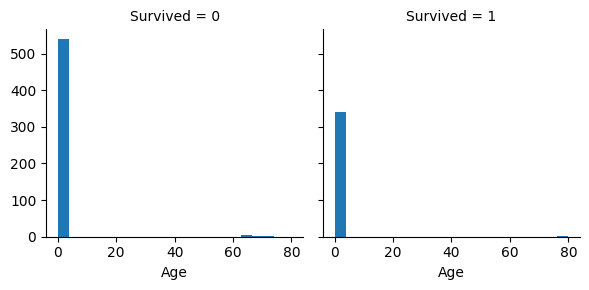

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# **Correlating numerical and ordinal features**

Using a single plot, we may mix numerous characteristics to detect relationships. This is possible with numerical and categorical characteristics having numerical values.

# Observations

Pclass=3 had the most passengers, but the majority died. Confirms our second classification assumption.
Infants in Pclass=2 and Pclass=3 were mainly safe. Our second categorising assumption is further qualified by the fact that the majority of passengers in Pclass=1 survived. Pclass fluctuates in terms of passenger age distribution, which confirms our third classifying assumption.

# Decision

Consider Pclass for model training.

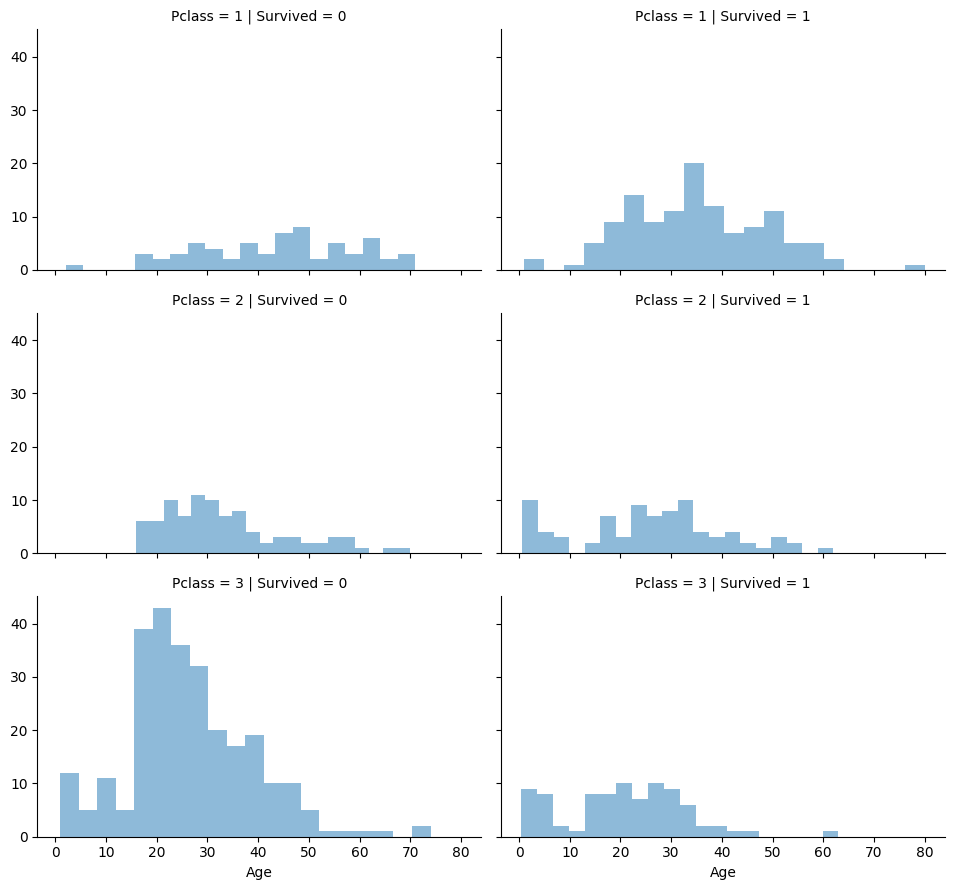

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# **Correlating Categorical Features**

Now we can correlate categorical features with our solution goal.

# Observation

1. Female passengers fared far better than male passengers in terms of survivability. Classification is confirmed (#1).
2. With the exception of Embarked=C, males had a greater survival rate. This might be a relationship between Pclass and Embarked, and then Pclass and Survived, rather than a straight relationship between Embarked and Survived.
3. Males exhibited a higher survival rate in Pclass=3 than in Pclass=2 for C and Q ports. Finished (#2).
4. Survival rates for Pclass=3 and male travellers differ by port of departure. Associated with (#1).



# Decision

1. Include a Sex component in model training.
2. Finish and add the Embarked feature to the model training.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


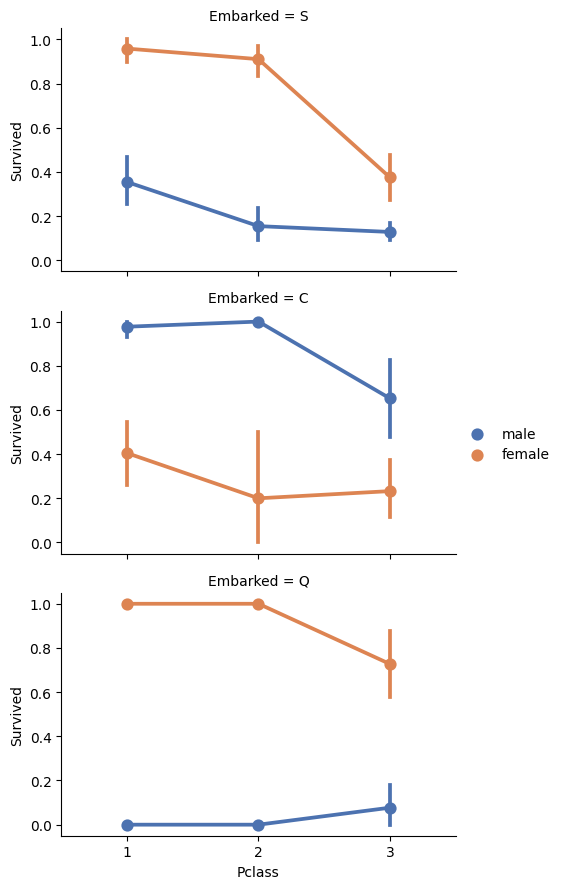

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# **Correlating categorical and numerical features**

We may also want to link category (non-numeric) and numerical characteristics. Correlating Embarked (categorical non-numeric), Sex (categorical non-numeric), Fare (Numeric continuous), and Survived (categorical numeric) is an option.


# Observations

1. Passengers who paid more fares fared better. Confirms our hypothesis for developing (#4) fare ranges.
2. Survival rates are related to the port of embarkation. Correlating (#1) and completing (#2) are confirmed.


# Decisions

Consider banding Fare feature.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

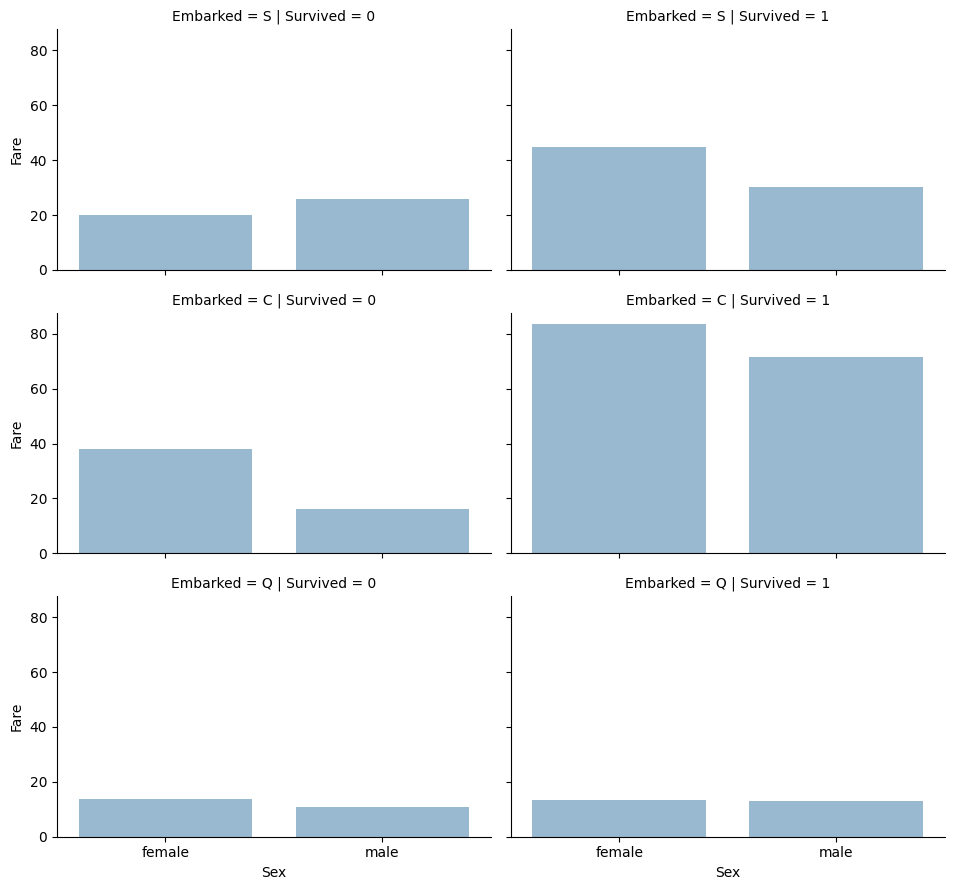

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# **Wrangle data**

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

# Correcting by dropping features

This is an excellent first objective to pursue. We are dealing with fewer data points as we remove characteristics. This speeds up our notebook and makes analysis easier.

We wish to remove the Cabin (correcting #2) and Ticket (correcting #1) features based on our assumptions and conclusions.

To maintain consistency, we run operations on both the training and testing datasets at the same time.


In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

# **Creating new feature extracting from existing**

Before deleting the Name and PassengerId features, we want to see if the Name feature can be built to extract titles and examine the association between titles and survivability.

Using regular expressions, we extract the Title feature in the following code. The RegEx pattern (w+.) matches the first word in the Name feature that ends with a dot character. The DataFrame is returned when the expand=False option is set.


# Observations

When we plot Title, Age, and Survived, we see the following observations.

Most titles band Age groups correctly. For example, the Master title has a typical age of 5 years.
Survival differs slightly throughout Title Age bands.
Certain titles either survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).


# Decision

We decide to retain the new Title feature for model training.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare.



In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.



In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.



In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

# Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


# **Completing a numerical continuous feature**

We should now begin estimating and filling in missing or null values for features. This will be done initially for the Age feature.

1. To finish a numerical continuous feature, we have three options.

2. A straightforward method is to generate random integers between the mean and standard deviation. Using other connected traits to predict missing numbers is a more accurate method. In our situation, we see a relationship between Age, Gender, and Pclass. Estimate Age values by comparing Age median values across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, median Age for Pclass=1 and Gender=1, and so on...

3. Methods 1 and 2 should be combined. Rather than assuming age values based on the median, utilise random integers between the mean and standard deviation based on Pclass and Gender combinations.

The first and third methods will inject random noise into our models. The outcomes of many executions may differ. Method 2 will be preferred.



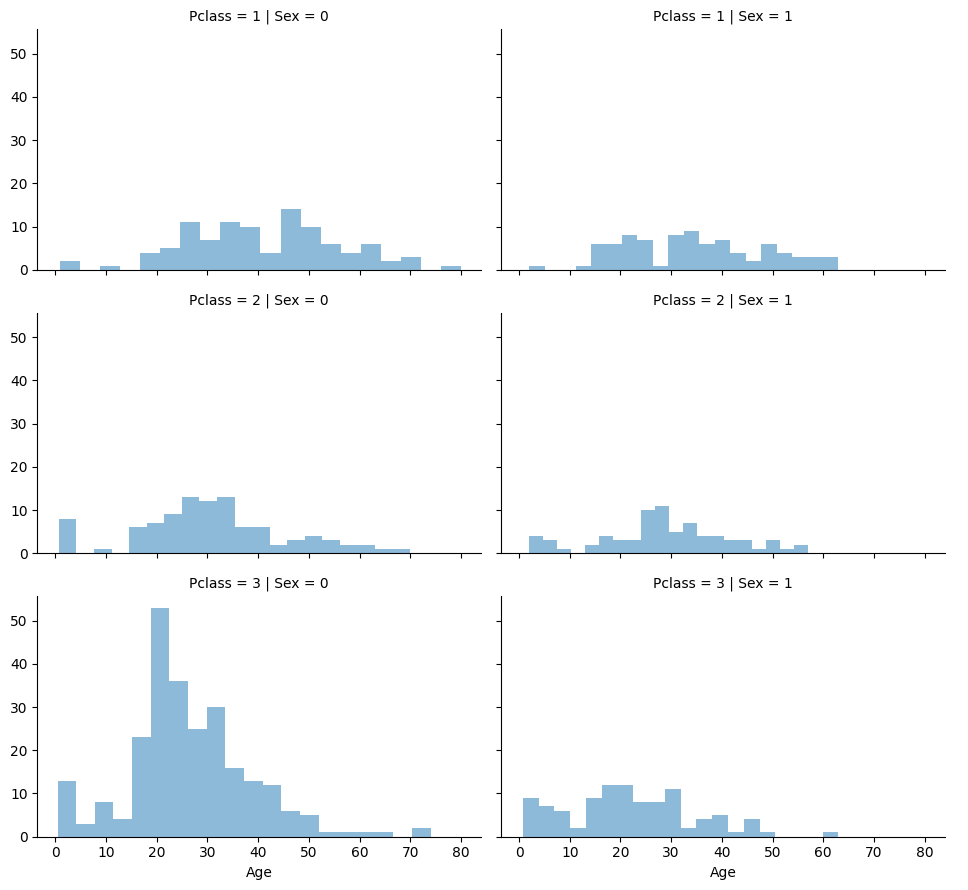

In [ ]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

To begin, create an empty array with estimated Age values based on Pclass x Gender pairings.


In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.



In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.



In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.



In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


# Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.



In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.



In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# **Completing a categorical feature**

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


# **Converting categorical feature to numeric**

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


# **Quick completing and converting a numeric feature**

We can now finish the Fare feature for a single missing value in the test dataset by using mode to determine the most commonly occurring value for this feature. We do this with a single line of code.

Because we are simply updating a single value, we are not building an intermediate new feature or performing any further analysis for correlation to predict the missing feature. The completion objective meets the criterion for the model algorithm to work on non-zero numbers.

We may also wish to round the fare to two decimal places because it represents cash.



In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can not create FareBand.



In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.



In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.



In [ ]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# **Model, predict and solve**

We can now train a model and forecast the desired solution. There are around 60 different predictive modelling methods to select from. To restrict down to a few models that we may analyse, we must first determine the type of problem and the solution requirements. Our issue is one of categorization and regression. We want to find a link between output (survived or not) and other variables or characteristics (gender, age, port...). We are also performing supervised learning, which is a type of machine learning in which we train our model using a supplied dataset. We may cut down our selection of models to a handful using these two criteria: Supervised Learning + Classification and Regression. These are some examples:
1. Logistic Regression
2. KNN or k-Nearest Neighbors
3. Support Vector Machines
4. Naive Bayes classifier
5. Decision Tree
6. Random Forrest
7. Perceptron
8. Artificial neural network
9. RVM or Relevance Vector Machine


In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Logistic Regression

Logistic Regression is an excellent model to utilise early in the process. Logistic regression estimates probabilities using a logistic function, which is the cumulative logistic distribution, to assess the connection between a categorical dependent variable (feature) and one or more independent variables (features). Consult Wikipedia.

Take note of the model's confidence score based on our training dataset.


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

Logistic Regression may be used to validate our assumptions and judgements for feature creation and goal completion. This is accomplished by computing the coefficients of the features in the decision function.

Positive coefficients raise the response's log-odds (and hence the probability), whereas negative coefficients lower the response's log-odds (and thus the probability).

1. Sex has the greatest positivie coefficient, suggesting that as the Sex value grows (male: 0 to female: 1), so does the likelihood of Survived=1.
2. Survived=1 probability diminishes the highest as Pclass grows.
3. As a result, Age*Class is an excellent artificial variable to predict because it has the second largest negative association with Survived.
4. Title is the second highest positive correlation.


In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


# Support Vector Machines

Following that, we model with Support Vector Machines, which are supervised learning models with related learning algorithms that analyse data for classification and regression analysis. Given a collection of training samples, each of which is labelled as belonging to one of two categories, an SVM training method creates a model that assigns fresh test samples to one of the two categories, resulting in a non-probabilistic binary linear classifier. Consult Wikipedia.

It should be noted that the model produces a higher confidence score than the Logistics Regression model.


In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

# KNN or k-Nearest Neighbors

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.



KNN confidence score is better than Logistics Regression but worse than SVM.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

# Gaussian Naive Bayes classifier

Naive Bayes classifiers are a type of basic probabilistic classifier in machine learning that is based on using Bayes' theorem with strong (naive) independence assumptions across the features. Naive Bayes classifiers are extremely scalable, with parameters that are proportional to the number of variables (features) in a learning task. Consult Wikipedia.


The model generated confidence score is the lowest among the models evaluated so far.

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

# Perceptron

The perceptron is a supervised learning approach for binary classifiers (functions that can determine whether or not an input, represented by a vector of numbers, belongs to a given class). It is a linear classifier, or a classification technique that predicts based on a linear predictor function that combines a set of weights with the feature vector. The method enables online learning by processing components in the training set one at a time. Consult Wikipedia.


In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

# Linear SVC

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.12

# Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.32

# Decision Tree

As a predictive model, this approach employs a decision tree, which translates features (tree branches) to inferences about the target value (tree leaves). Classification trees are tree models in which the goal variable can take a finite set of values; in these tree structures, leaves indicate class labels and branches represent feature conjunctions that lead to those class labels. Regression trees are decision trees in which the target variable can take continuous values (usually real numbers). Consult Wikipedia.

The model confidence score is the highest of any model tested thus far.


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

# Random Forests

The following design One of the most popular is Random Forests. Random forests, also known as random decision forests, are an ensemble learning method for classification, regression, and other tasks that work by constructing a large number of decision trees (n_estimators=100) during training and then outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Consult Wikipedia.

The model confidence score is the highest of any model tested thus far. We decide to utilise the output of this model (Y_pred) to create our competition submission of results.


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

# **Model Evaluation**

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,76.32
4,Naive Bayes,72.28
